<a href="https://colab.research.google.com/github/ACoolA-008/Data_Science_Projects/blob/main/Deep%20Learning%20Projects/Predicting_Tax_Fares_with_Deep_Feedforward_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [67]:
%cd /content/drive/MyDrive/Kaggle/

/content/drive/MyDrive/Kaggle


In [68]:
# !kaggle competitions download -c new-york-city-taxi-fare-prediction

In [69]:
# ! unzip new-york-city-taxi-fare-prediction.zip

In [70]:
import pandas as pd
df = pd.read_csv("train.csv", parse_dates=['pickup_datetime'], nrows=500000) # use the first 500,000 rows

In [71]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


Visualize Pickup Locations in NYC

In [72]:
# Based NYC's longitudinal and latitudinal ranges we need to set upper and lower bounds for each geospacial coordinate.

# range of longitude for NYC
minLo_nyc = -74.05
maxLo_nyc = -73.75

# range of latitude for NYC
minLa_nyc = 40.63
maxLa_nyc = 40.85

df2 = df.copy(deep=True)
for long in ['pickup_longitude', 'dropoff_longitude']:
  df2 = df2[(df2[long]> minLo_nyc) & (df2[long] < maxLo_nyc)]

for lat in ['pickup_latitude', 'dropoff_latitude']:
  df2 = df2[(df2[lat] > minLa_nyc) & (df2[lat] < maxLa_nyc)]

In [73]:
df2.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [74]:
# store landmarks in nyc
landmarks = {'JFK Airport': (-73.78, 40.643),
             'Laguardia Airport': (-73.87, 40.77),
             'Midtown': (-73.98, 40.76),
             'Lower Manhattan': (-74.00, 40.72),
             'Upper Manhattan': (-73.94, 40.82),
             'Brooklyn': (-73.95, 40.66)}

In [75]:
import matplotlib.pyplot as plt

def plot_lat_long(df, landmarks, points='Pickup'):
    plt.figure(figsize = (12,12)) # set figure size
    if points == 'pickup':
        plt.plot(list(df.pickup_longitude), list(df.pickup_latitude),
                 '.', markersize=1)
    else:
        plt.plot(list(df.dropoff_longitude), list(df.dropoff_latitude),
                 '.', markersize=1)

    for landmark in landmarks:
        plt.plot(landmarks[landmark][0], landmarks[landmark][1],
                '*', markersize=15, alpha=1, color='r')
        plt.annotate(landmark, (landmarks[landmark][0]+0.005,
                     landmarks[landmark][1]+0.005), color='r',
                     backgroundcolor='w')

    plt.title("{} Locations in NYC Illustrated".format(points))
    plt.grid(None)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.show()

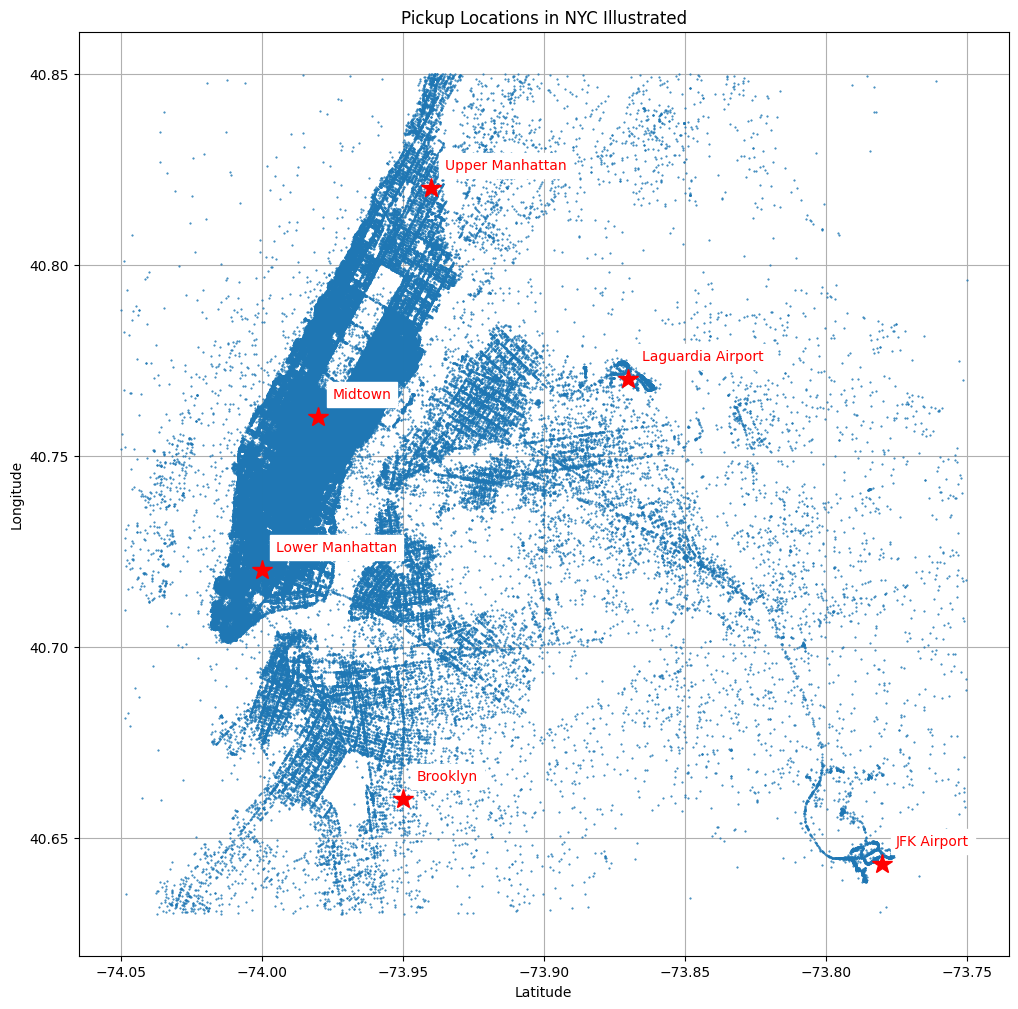

In [76]:
plot_lat_long(df2, landmarks, points='Pickup')

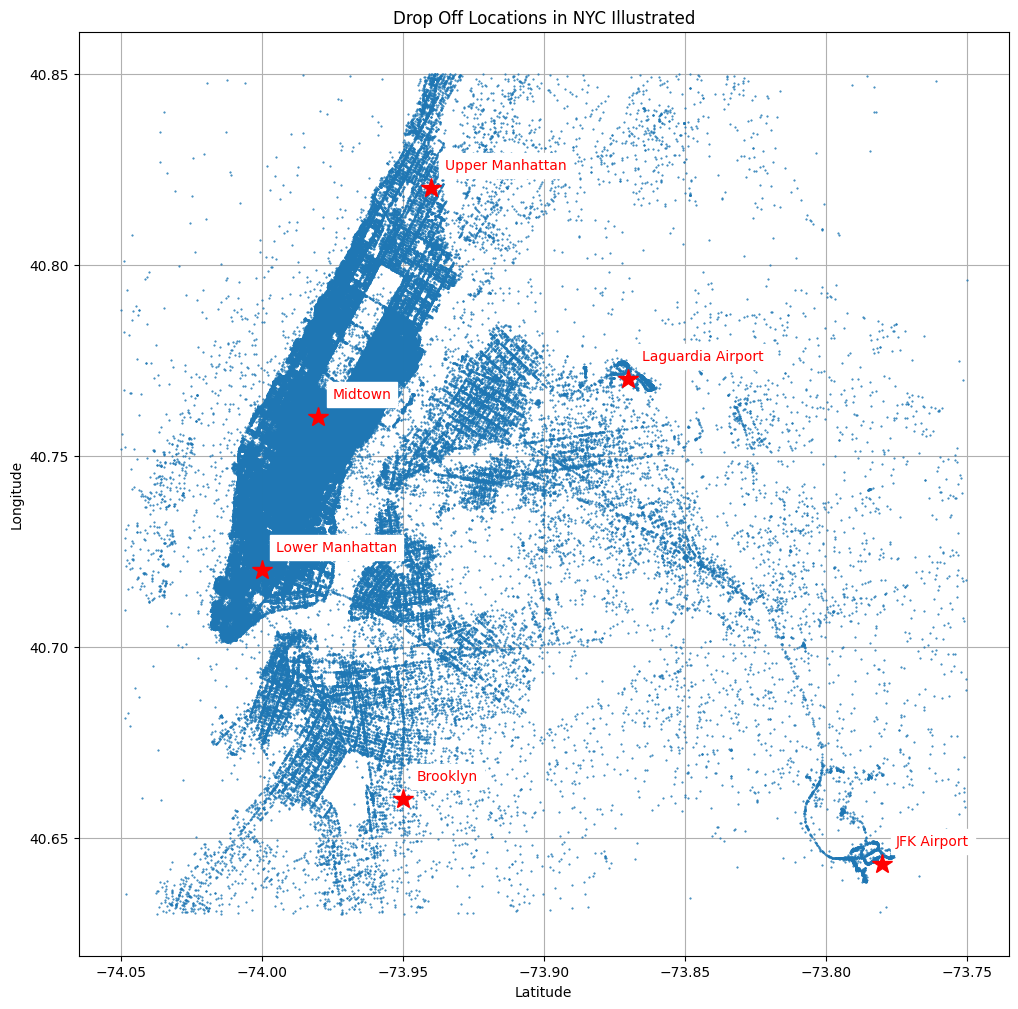

In [77]:
plot_lat_long(df2, landmarks, points='Drop Off')

Separate Pickup Datetime Formats

Original Data: 2009-06-15 17:26:21+00:00
Year-Month-Day Hour:Minute:Second

In [78]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour

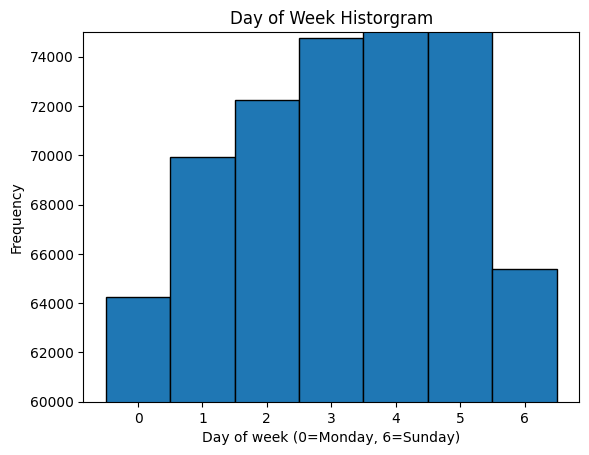

In [79]:
# Plot a historgram of ridership through weeks

import numpy as np
df['day_of_week'].plot.hist(bins=np.arange(8)-0.5, ec='black',ylim=(60000,75000)) # edge color set to "black", ylimitation is set to 60000,75000
plt.xlabel('Day of week (0=Monday, 6=Sunday)')
plt.title("Day of Week Historgram")
plt.show()

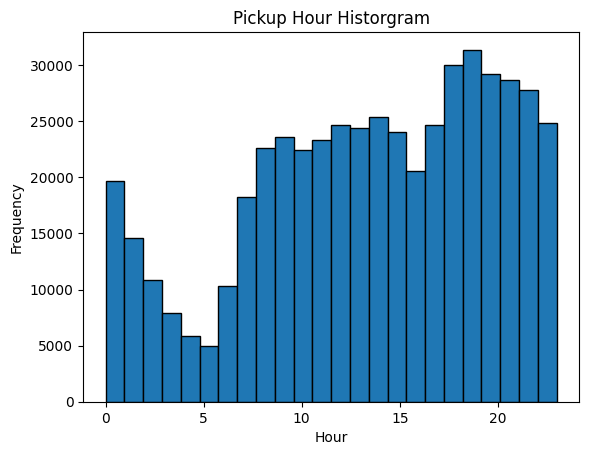

In [80]:
# Plot a historgram of ridership through hours

df['hour'].plot.hist(bins=24, ec='black')
plt.title("Pickup Hour Historgram")
plt.xlabel('Hour')
plt.show()

Data Preprocessing

In [81]:
print(df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64


In [82]:
df = df.dropna()

In [83]:
print(df.describe())

         fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  499995.000000     499995.000000    499995.000000      499995.000000   
mean       11.358182        -72.520091        39.920350         -72.522435   
std         9.916069         11.856446         8.073318          11.797362   
min       -44.900000      -2986.242495     -3116.285383       -3383.296608   
25%         6.000000        -73.992047        40.734916         -73.991382   
50%         8.500000        -73.981785        40.752670         -73.980126   
75%        12.500000        -73.967117        40.767076         -73.963572   
max       500.000000       2140.601160      1703.092772          40.851027   

       dropoff_latitude  passenger_count           year          month  \
count     499995.000000    499995.000000  499995.000000  499995.000000   
mean          39.916526         1.683445    2011.739129       6.268617   
std            7.391002         1.307391       1.860897       3.437798   
m

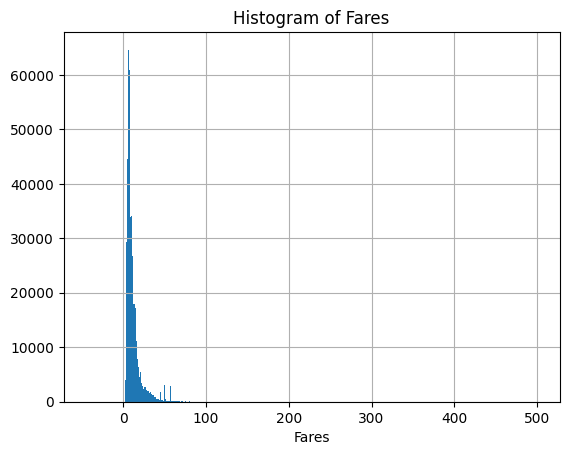

In [84]:
# Note in the fare_amount column, the minimum fare is abnormally negative and the maximum is also unusually high.
# We plot a histogram to look into the distrubution of fare_amount column.

df['fare_amount'].hist(bins=500)
plt.xlabel('Fares')
plt.title("Histogram of Fares")
plt.show()

In [85]:
# From the histogram we merely found any outliers therefore
# the maximum and minimum fares can be safely removed without causing any problems to analyzing the data
# Code: Limit the range of the fare amounts to (0,100]

df = df[(df['fare_amount'] > 0) & (df['fare_amount'] <= 100)]



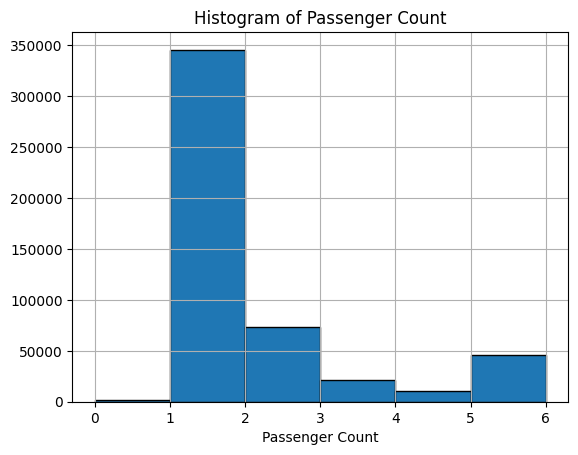

In [86]:
# Then we examine the passenger_count column
df['passenger_count'].hist(bins=6, ec='black')
plt.xlabel('Passenger Count')
plt.title("Histogram of Passenger Count")
plt.show()

In [87]:
# 0 passengers seem to be an outlier but removing them may affect the data anlysis as they take up a portion of the sample data.
# We want to replace 0 with mode.

# passenger_count_mode = df['passenger_count'].mode()
# print(passenger_count_mode)

df.loc[df['passenger_count']==0, 'passenger_count'] = 1

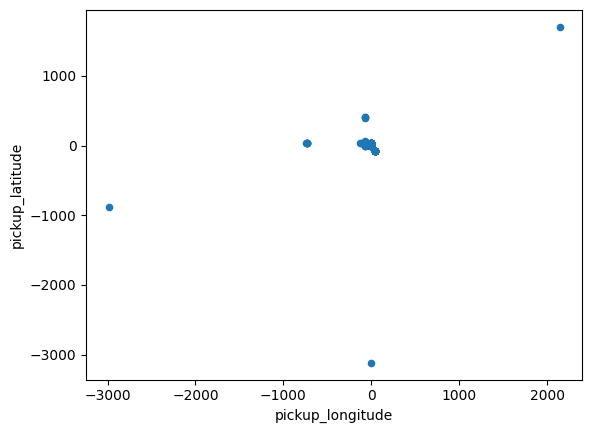

In [88]:
# Examine the pickup_longitude and pickup_latitude for outliers

df.plot.scatter('pickup_longitude', 'pickup_latitude')
plt.show()

In [89]:
# Latitude as high as 1000 and as low as -3000 shown in the graph does not exist in the real world geographical system
# therefore we can safely remove them as outliers by setting a limitation in range of longitude and latitude of NYC.



# Based NYC's longitudinal and latitudinal ranges we need to set upper and lower bounds for each geospacial coordinate.
# We use df dataframe rather than the former df2 dataframe

# range of longitude for NYC
minLo_nyc = -74.05
maxLo_nyc = -73.75

# range of latitude for NYC
minLa_nyc = 40.63
maxLa_nyc = 40.85

for long in ['pickup_longitude', 'dropoff_longitude']:
  df = df[(df[long]> minLo_nyc) & (df[long] < maxLo_nyc)]

for lat in ['pickup_latitude', 'dropoff_latitude']:
  df = df[(df[lat] > minLa_nyc) & (df[lat] < maxLa_nyc)]

Organize the Preprocessing Step in one Function

In [90]:
def preprocess(df):

  # remove missing values
  def remove_missing_values(df):
    df = df.dropna()
    return df

  # remove outliers in fare_amount column
  def remove_fare_amount_outliers(df, lower_bound, upper_bound):
    df = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]
    return df

  # replace outliers in passenger_count column
  def replace_passenger_count_outliers(df):
    mode = df['passenger_count'].mode()
    df.loc[df['passenger_count']== 0, 'passenger_count'] = mode
    return df

  # remove outliers in latitude and longitude
  def remove_latitude_longitude_outliers(df):
    # Set legitimate NYC longitude
    nyc_min_longitude = -74.05
    nyc_max_longitude = -73.75
    # Set legitimate NYC latitude
    nyc_min_latitude = 40.63
    nyc_max_latitude = 40.85
    # Set boundary in NYC

    for long in ['pickup_longitude', 'dropoff_longitude']:
      df = df[(df[long]> nyc_min_longitude) & (df[long] < nyc_max_longitude)]

    for lat in ['pickup_latitude', 'dropoff_latitude']:
      df = df[(df[lat] > nyc_min_latitude) & (df[lat] < nyc_max_latitude)]

    return df

  df = remove_missing_values(df)
  df = remove_fare_amount_outliers(df, lower_bound=0, upper_bound=100)
  df = replace_passenger_count_outliers(df)
  df = remove_latitude_longitude_outliers(df)

  return df





Feature Engineering

In [91]:
# Check the pickup datetime information in the first 5 rows

print(df.head()['pickup_datetime'])

0   2009-06-15 17:26:21+00:00
1   2010-01-05 16:52:16+00:00
2   2011-08-18 00:35:00+00:00
3   2012-04-21 04:30:42+00:00
4   2010-03-09 07:51:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]


In [92]:
# Since neural network must use numerical features, we will transform datetime format to the expected format.

df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour

print(df.loc[:5, ["pickup_datetime", 'year', 'month', 'day', 'day_of_week', 'hour']])

            pickup_datetime  year  month  day  day_of_week  hour
0 2009-06-15 17:26:21+00:00  2009      6   15            0    17
1 2010-01-05 16:52:16+00:00  2010      1    5            1    16
2 2011-08-18 00:35:00+00:00  2011      8   18            3     0
3 2012-04-21 04:30:42+00:00  2012      4   21            5     4
4 2010-03-09 07:51:00+00:00  2010      3    9            1     7
5 2011-01-06 09:50:45+00:00  2011      1    6            3     9


In [93]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


In [94]:
# We confirm the new features are created into the original dataframe df
# therefore we delete "pickup_datetime"

df = df.drop(['pickup_datetime'], axis=1)

In [95]:
# One of the most important information we can compute based on the geolocation information is distance.
# As limited with continuous geolocation data, we use Euclidean Distance formula to calculate simple straight-line distances.

def compute_euclidean_distance(latitude1, longitude1, latitude2, longitude2):
  return ((latitude1-latitude2)**2 + (longitude1-longitude2)**2) ** 0.5

In [96]:
# Create a new distance column to store the straight-line distances

df['distance'] = compute_euclidean_distance(df['pickup_latitude'],
                                            df['pickup_longitude'],
                                            df['dropoff_latitude'],
                                            df['dropoff_longitude'])

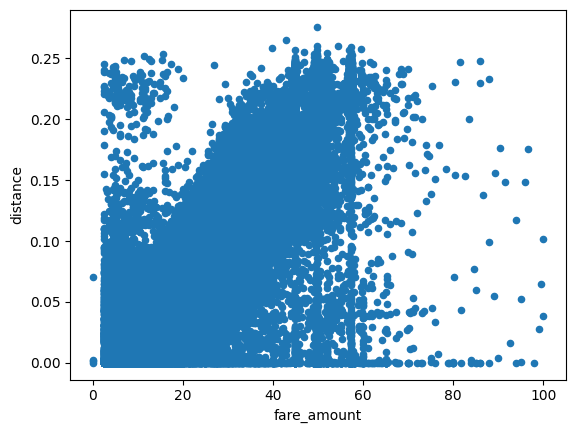

In [97]:
# Visualize the relationships between fare_amount variable and distance variable in a scatter plot

df.plot.scatter('fare_amount', 'distance')
plt.show()

In [98]:
# The trend is clearly seen with an increasing mode for the majority fare_amount and distance relationship.
# We also observe 3 vertical lines are formed between 40 - 60 dollar fare_amount.
# Recalling from the real-world system, we understand the flat fare of $52 plus tolls are applied to airport pickups.
# Therefore, we treat the points in the vertical lines as airport rides.

# The next step we will have to do is to calculate the pickup and drop off distances from the 3 major airports in NYC.

airports = {'JFK_Airport': (-73.78, 40.643),
            'Laguardia_Airport': (-73.87, 40.77),
            'Newark_Airport': (-74.18, 40.69)}

for airport in airports:
  df['pickup_dist_' + airport] = compute_euclidean_distance(df['pickup_latitude'],
                                                            df['pickup_longitude'],
                                                            airports[airport][1],
                                                            airports[airport][0])
  df['dropoff_dist_' + airport] = compute_euclidean_distance(df['dropoff_latitude'],
                                                            df['dropoff_longitude'],
                                                            airports[airport][1],
                                                            airports[airport][0])


In [99]:
print(df[['key', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_dist_JFK_Airport', 'dropoff_dist_JFK_Airport']].head())

                             key  pickup_longitude  pickup_latitude  \
0    2009-06-15 17:26:21.0000001        -73.844311        40.721319   
1    2010-01-05 16:52:16.0000002        -74.016048        40.711303   
2   2011-08-18 00:35:00.00000049        -73.982738        40.761270   
3    2012-04-21 04:30:42.0000001        -73.987130        40.733143   
4  2010-03-09 07:51:00.000000135        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  pickup_dist_JFK_Airport  \
0         -73.841610         40.712278                 0.101340   
1         -73.979268         40.782004                 0.245731   
2         -73.991242         40.750562                 0.234714   
3         -73.991567         40.758092                 0.225895   
4         -73.956655         40.783762                 0.225847   

   dropoff_dist_JFK_Airport  
0                  0.092710  
1                  0.242961  
2                  0.237050  
3                  0.240846  
4                  0

In [100]:
df = df.drop(['key'], axis=1)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour,distance,pickup_dist_JFK_Airport,dropoff_dist_JFK_Airport,pickup_dist_Laguardia_Airport,dropoff_dist_Laguardia_Airport,pickup_dist_Newark_Airport,dropoff_dist_Newark_Airport
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,0.009436,0.101340,0.092710,0.055043,0.064326,0.337147,0.339123
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,0.079696,0.245731,0.242961,0.157402,0.109925,0.165330,0.220812
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,0.013674,0.234714,0.237050,0.113076,0.122790,0.209742,0.198236
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,0.025340,0.225895,0.240846,0.122792,0.122149,0.197636,0.200358
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,0.019470,0.225847,0.225878,0.098115,0.087741,0.225807,0.242228


In [101]:
# Now we want to organize the above code blocks in a nested feature_engieer method

def feature_engineer(df):
  def create_separate_time_features(df):
    df['year'] = df['pickup_datetime'].dt.year
    df['month'] = df['pickup_datetime'].dt.month
    df['day'] = df['pickup_datetime'].dt.day
    df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
    df['hour'] = df['pickup_datetime'].dt.hour
    df = df.drop(['pickup_datetime'], axis=1)
    return df

  # Compute euclidean distance between 2 places based on geolocation information
  def compute_euclidean_distance(latitude1, longitude1, latitude2, longitude2):
    return (((latitude1-latitude2)**2 + (longitude1-longitude2)**2)**0.5)

  # Create a new distance column
  def create_pickup_dropoff_distance_feature(df):
    df['travel_distance'] = compute_euclidean_distance(df['pickup_latitude'],
                                                       df['pickup_longitude'],
                                                       df['dropoff_latitude'],
                                                       df['dropoff_longitude'])
    return df

  # Creat airport rides distance feature
  def create_airport_distance_feature(df):
    airports = {'JFK_Airport': (-73.78, 40.643),
            'Laguardia_Airport': (-73.87, 40.77),
            'Newark_Airport': (-74.18, 40.69)}

    for airport in airports:
      df['pickup_dist_' + airport] = compute_euclidean_distance(df['pickup_latitude'],
                                                                df['pickup_longitude'],
                                                                airports[airport][1],
                                                                airports[airport][0])
      df['dropoff_dist_' + airport] = compute_euclidean_distance(df['dropoff_latitude'],
                                                                df['dropoff_longitude'],
                                                                airports[airport][1],
                                                                airports[airport][0])
      return df

  df = create_separate_time_features(df)
  df = create_pickup_dropoff_distance_feature(df)
  df = create_airport_distance_feature(df)
  df = df.drop(['key'], axis=1)

  return df



Feature Scaling



In [102]:
# Feature Scaling ensures that a feature like year with data like 2000 will not dominate other important features with smaller
# scales for example 1-10.

# Store a pre-scaled dataframe
prescaled_df = df.copy()

In [103]:
# Drop the target variable so it will not be scaled before scaling all variables in the dataframe
df_scaled = df.drop(['fare_amount'], axis=1)

In [104]:
from sklearn.preprocessing import scale

df_scaled = scale(df_scaled)

In [105]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day', 'day_of_week', 'hour', 'distance',
       'pickup_dist_JFK_Airport', 'dropoff_dist_JFK_Airport',
       'pickup_dist_Laguardia_Airport', 'dropoff_dist_Laguardia_Airport',
       'pickup_dist_Newark_Airport', 'dropoff_dist_Newark_Airport'],
      dtype='object')

In [106]:
cols = df.columns.tolist()
cols.remove('fare_amount')
df_scaled = pd.DataFrame(df_scaled, columns=cols, index=df.index)

# add the target variable back to the scaled dataframe
df_scaled = pd.concat([df_scaled, df['fare_amount']],axis=1)
# make a copy of the complete scaled dataframe df
df = df_scaled.copy()


Deep Feedforward Networks

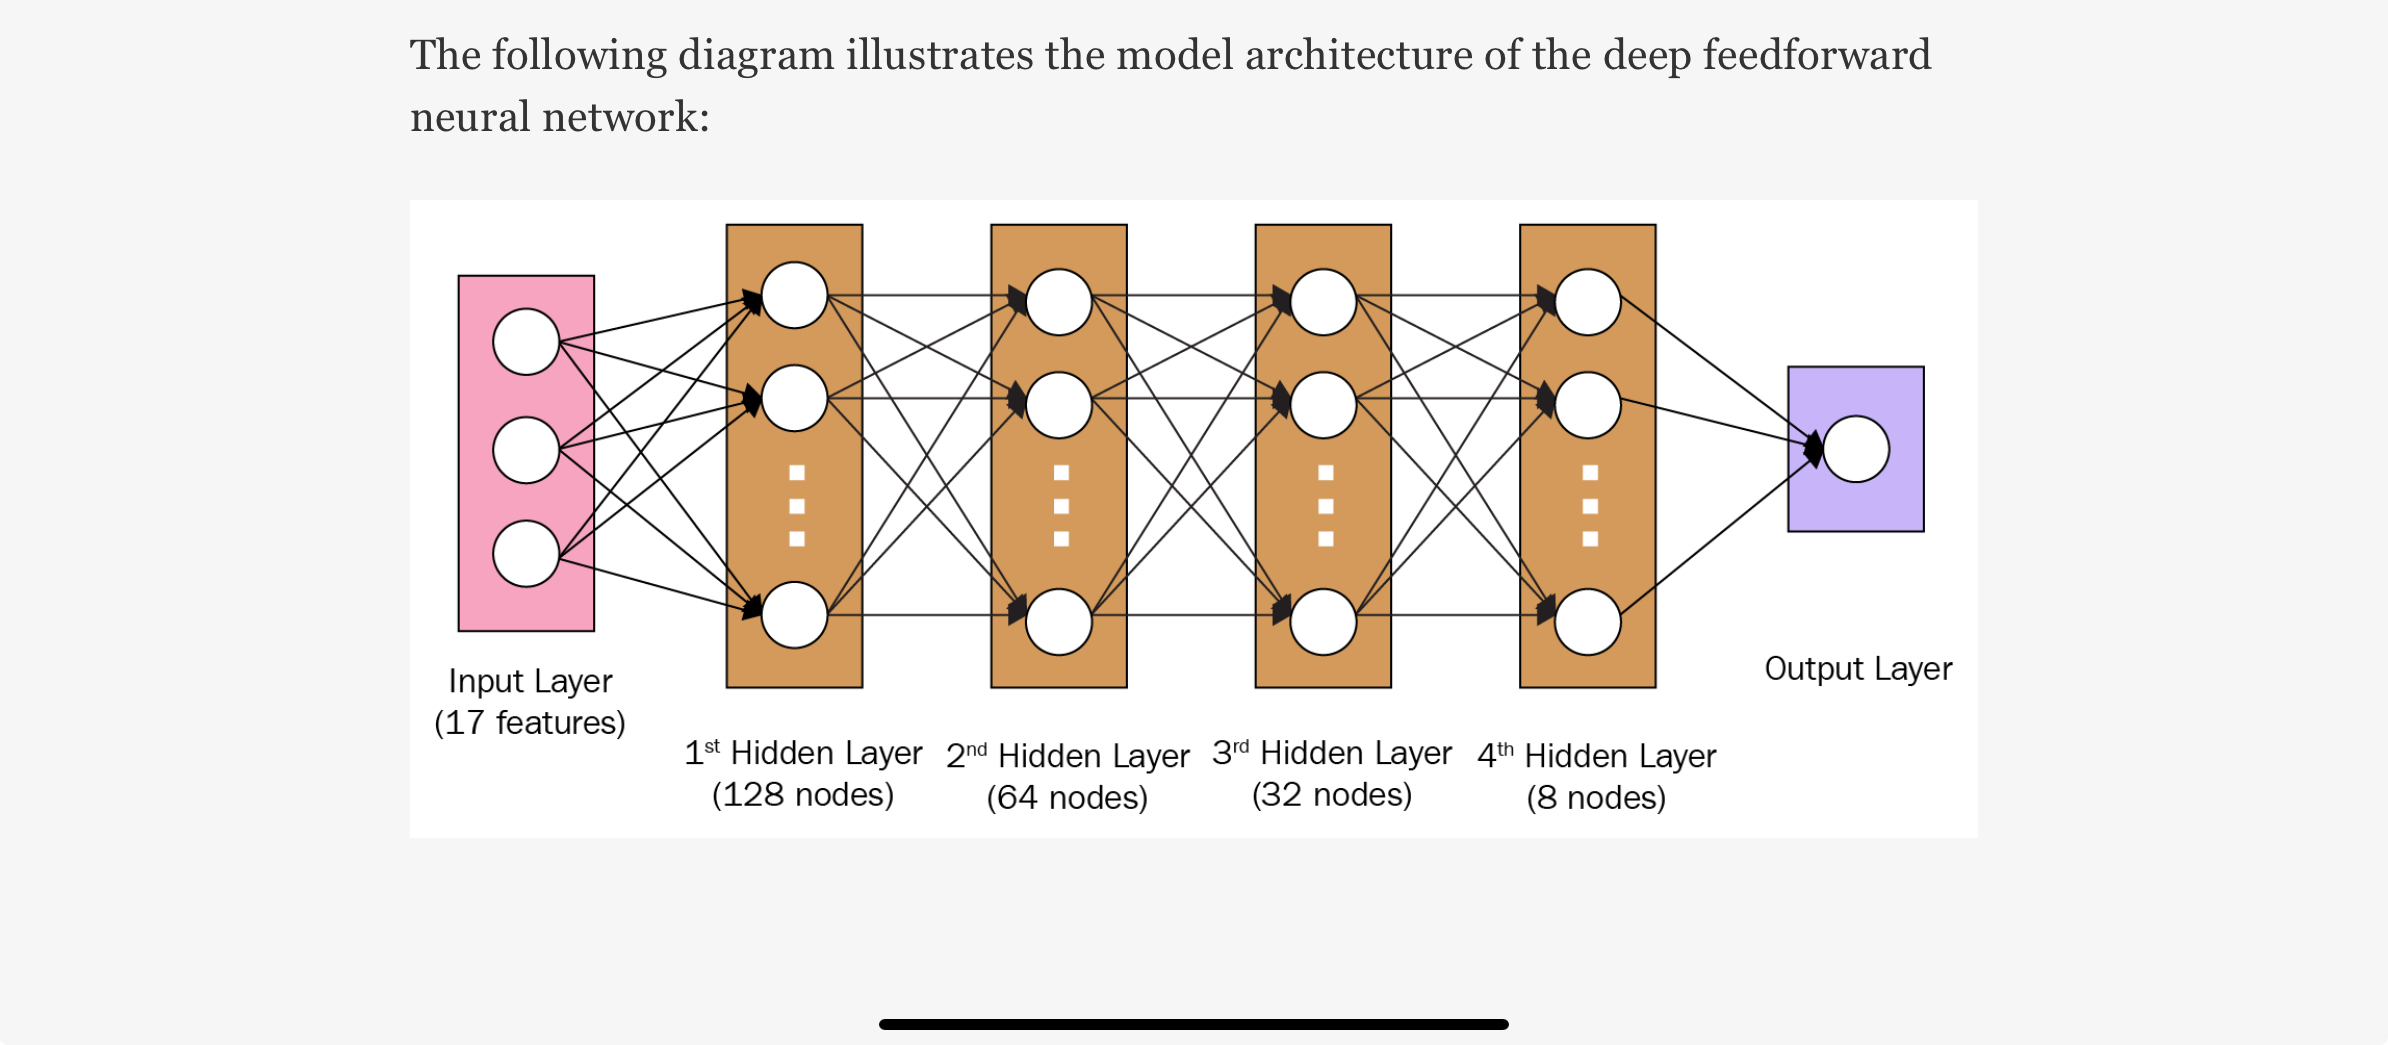

In [107]:
X = df.loc[:, df.columns != 'fare_amount']
y = df.loc[:, 'fare_amount']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [108]:
X_train


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour,distance,pickup_dist_JFK_Airport,dropoff_dist_JFK_Airport,pickup_dist_Laguardia_Airport,dropoff_dist_Laguardia_Airport,pickup_dist_Newark_Airport,dropoff_dist_Newark_Airport
333633,0.902331,1.368708,1.195232,1.890760,-0.526894,-1.469613,1.084544,-0.884591,-0.020956,-0.850871,-0.345066,-0.195885,0.006728,-1.428312,-1.475346,1.117543,1.574259
226105,0.072868,1.600060,0.585820,0.792166,-0.526894,-0.932847,-0.078206,-0.884591,-1.047528,0.689475,-0.192618,0.613693,-0.203812,-0.284240,-1.037666,0.466661,0.687611
113144,0.106619,0.175522,-0.036141,0.473174,1.006734,-0.932847,1.375231,1.304118,1.005616,1.459648,-0.635713,-0.085785,0.194250,-0.389003,-0.238063,0.097146,0.045840
140306,3.124677,0.871944,6.452306,-1.112479,-0.526894,-1.469613,1.665918,1.534508,-1.047528,0.689475,2.305634,-2.109266,-5.162882,-4.377573,0.083497,3.013247,5.797329
464016,-0.564346,-0.208388,-0.970394,-0.386756,-0.526894,-1.469613,0.212482,1.419313,-1.047528,-0.850871,-0.568390,0.398830,0.727753,0.570416,1.084093,-0.600340,-1.014111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103137,-0.454525,-0.321991,-0.759181,-0.416845,0.239920,1.750980,-1.240955,-1.575762,-1.560814,-0.234733,-0.669845,0.251828,0.498586,0.450498,0.827806,-0.522960,-0.829402
145829,-0.464554,-0.685014,-0.704022,-0.920037,-0.526894,-0.932847,0.503169,0.036971,-1.560814,0.073336,-0.633364,0.137269,0.251632,0.562049,0.922508,-0.598663,-0.873732
304707,-0.530501,-0.344979,-0.303097,0.135042,3.307175,1.750980,-0.368893,-0.539005,-1.560814,-0.696837,-0.464389,0.317385,0.282780,0.555708,0.137933,-0.597548,-0.284665
207809,0.151610,0.628387,0.715338,1.096055,-0.526894,0.140684,0.793856,-1.575762,1.518902,0.381406,-0.240689,0.072714,-0.132642,-0.489405,-1.169687,0.247443,0.893437


In [109]:
print(X_train.isna().sum())

pickup_longitude                  0
pickup_latitude                   0
dropoff_longitude                 0
dropoff_latitude                  0
passenger_count                   0
year                              0
month                             0
day                               0
day_of_week                       0
hour                              0
distance                          0
pickup_dist_JFK_Airport           0
dropoff_dist_JFK_Airport          0
pickup_dist_Laguardia_Airport     0
dropoff_dist_Laguardia_Airport    0
pickup_dist_Newark_Airport        0
dropoff_dist_Newark_Airport       0
dtype: int64


In [110]:
X_train.shape

(386741, 17)

In [111]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1])) # input dimension is the number of input features
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [112]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               2304      
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 8)                 264       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 12913 (50.44 KB)
Trainable params: 12913 (50.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [113]:
# Compile the neural network
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Train the neural network
model.fit(X_train, y_train, epochs=1)

12086/12086 [==============================] - 46s 4ms/step - loss: 13.9492 - mse: 13.9492


In [115]:
prescaled_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour,distance,pickup_dist_JFK_Airport,dropoff_dist_JFK_Airport,pickup_dist_Laguardia_Airport,dropoff_dist_Laguardia_Airport,pickup_dist_Newark_Airport,dropoff_dist_Newark_Airport
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,0.009436,0.101340,0.092710,0.055043,0.064326,0.337147,0.339123
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,0.079696,0.245731,0.242961,0.157402,0.109925,0.165330,0.220812
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,0.013674,0.234714,0.237050,0.113076,0.122790,0.209742,0.198236
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,0.025340,0.225895,0.240846,0.122792,0.122149,0.197636,0.200358
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,0.019470,0.225847,0.225878,0.098115,0.087741,0.225807,0.242228


In [116]:
# Create a predict function to test the accuracy of the neural network with test set data points
def predict_random(df_prescaled, X_test, model):
  """
  use df_prescaled to make sure that the final result is human-readable.
  """
  sample = X_test.sample(n=1, random_state=np.random.randint(low=0, high=10000))
  idx = sample.index[0]
  actual_fare = df_prescaled.loc[idx, 'fare_amount']
  day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
  day_of_week = day_names[df_prescaled.loc[idx, 'day_of_week']]
  hour = df_prescaled.loc[idx,'hour']
  predicted_fare = model.predict(sample)[0][0]
  rmse = np.sqrt(np.square(predicted_fare - actual_fare))

  print("Trip Details: {}, {}: 00hrs".format(day_of_week, hour))
  print("Actual fare: ${:0.2f}".format(actual_fare))
  print("Predicted fare: ${:0.2f}".format(predicted_fare))
  print("RMSE: ${:0.2f}".format(rmse))

In [117]:
# Run a random sample for prediction
predict_random(prescaled_df, X_test, model)

1/1 [==============================] - 0s 31ms/step
Trip Details: Sunday, 3: 00hrs
Actual fare: $8.00
Predicted fare: $7.16
RMSE: $0.84


In [114]:
from sklearn.metrics import mean_squared_error

train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

3022/3022 [==============================] - 5s 2ms/step


In [122]:
print("Train RMSE: {:0.2f}".format(train_rmse))
print("Train RMSE: {:0.2f}".format(test_rmse))

Train RMSE: 3.51
Train RMSE: 3.53
